In [46]:
import pandas as pd
import numpy as np
import json
import requests
from requests import session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os


load_dotenv()
API_KEY = os.getenv("COINMARKET_API")
API_URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest"

coin_symbol = "BTC"

parameters = {
    "symbol": coin_symbol,
    "convert": "USD",
}

headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY
}

session = requests.Session()
session.headers.update(headers)

try:
    response = session.get(API_URL, params=parameters)
    data = response.json()
    print(json.dumps(data, indent=4))
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")


{
    "status": {
        "timestamp": "2025-02-14T17:56:06.135Z",
        "error_code": 0,
        "error_message": null,
        "elapsed": 24,
        "credit_count": 1,
        "notice": null
    },
    "data": {
        "BTC": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "slug": "bitcoin",
            "num_market_pairs": 11941,
            "date_added": "2010-07-13T00:00:00.000Z",
            "tags": [
                "mineable",
                "pow",
                "sha-256",
                "store-of-value",
                "state-channel",
                "coinbase-ventures-portfolio",
                "three-arrows-capital-portfolio",
                "polychain-capital-portfolio",
                "binance-labs-portfolio",
                "blockchain-capital-portfolio",
                "boostvc-portfolio",
                "cms-holdings-portfolio",
                "dcg-portfolio",
                "dragonfly-capital-portfolio",
 

In [70]:
#  show statistics
df.describe()


,price
count,10.000000
mean,10231.419064
std,31078.642685
min,0.235195
25%,0.869729
50%,1.877570
75%,554.686078
max,98648.452259


In [74]:
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
parameters = {
    "start": "1",
    "limit": "3",  # get 3 first coins
    "convert": "USD"
}

response = requests.get(url, params=parameters, headers=headers)
data = response.json()

print(data)

{'status': {'timestamp': '2025-02-14T18:43:05.894Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 10887}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11941, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [76]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

# Load API key from .env file
load_dotenv()
API_KEY = os.getenv("COINMARKET_API")

# API endpoint to fetch latest cryptocurrency data
url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

# Parameters for the API request
parameters = {
    "start": "1",     # Start from the first cryptocurrency
    "limit": "10",    # Get the top 10 cryptocurrencies
    "convert": "USD"  # Convert prices to USD
}

headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY
}

# Fetch data from API
response = requests.get(url, headers=headers, params=parameters)
data = response.json()

# Convert API response to DataFrame
crypto_data = data["data"]  # Extract cryptocurrency data
df = pd.DataFrame(crypto_data)

# Select only relevant columns
df = df[["name", "quote"]]

# Extract prices
df["price"] = df["quote"].apply(lambda x: x["USD"]["price"])

# Drop unnecessary columns
df = df[["name", "price"]]

# Show the first few rows
print(df.head())


          name         price
0      Bitcoin  98301.772723
1     Ethereum   2763.828030
2          XRP      2.756892
3  Tether USDt      1.000315
4       Solana    203.719302


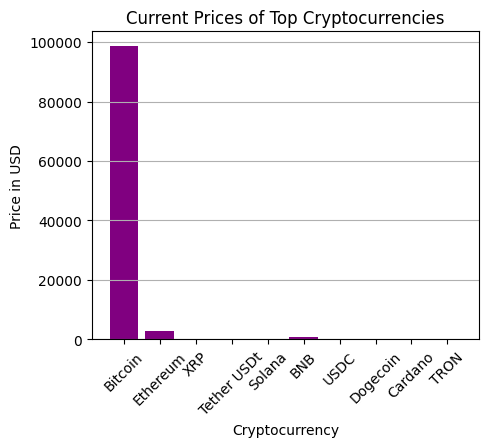

In [55]:
# Plot cryptocurrency prices
plt.figure(figsize=(5, 4))
plt.bar(df["name"], df["price"], color="purple")

# Customize chart
plt.xlabel("Cryptocurrency")
plt.ylabel("Price in USD")
plt.title("Current Prices of Top Cryptocurrencies")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(axis="y")

# Show plot
plt.show()


In [66]:

different_currencies = ['SEK','DKK']
response_list = []
for currency in different_currencies:
    paramteres = {
        'slug' : 'ethereum',
        'convert' : currency
    }
    response = requests.get(API_URL, params=paramteres, headers=headers)
    if response.status_code == 200:
        coin_data = response.json()["data"]
        response_list.append(coin_data)
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
response_list

[{'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'slug': 'ethereum',
   'num_market_pairs': 9931,
   'date_added': '2015-08-07T00:00:00.000Z',
   'tags': ['pos',
    'smart-contracts',
    'ethereum-ecosystem',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'heco-ecosystem',
    'binance-labs-portfolio',
    'solana-ecosystem',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'hashkey-capital-portfolio',
    'kenetic-capital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfolio',
    'usv-portfolio',
    'placeholder-ventures-portfolio',
    'pantera-capital-portfolio',
    'multicoin-capital-